In [9]:
import pandas as pd
import numpy as np

In [14]:
data=pd.read_csv('compresive_strength_concrete.csv')

In [20]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age in day,Concrete Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [16]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [18]:
data.rename({'Cement (component 1)(kg in a m^3 mixture)':'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast Furnace Slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly Ash',
       'Water  (component 4)(kg in a m^3 mixture)':'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse Aggregate',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine Aggregate', 'Age (day)':'Age in day',
       'Concrete compressive strength(MPa, megapascals) ':'Concrete Strength'},axis=1,inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age in day          1030 non-null   int64  
 8   Concrete Strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
data.shape

(1030, 9)

In [21]:
data.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age in day            0
Concrete Strength     0
dtype: int64

### EDA

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age in day,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Concrete Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [24]:
#Finding outliers

- cement

In [51]:
from scipy import stats
#finding q1,q3 and iqr
cement_q1=data['Cement'].quantile(q=.25)
cement_q3=data['Cement'].quantile(q=.75)
cement_iqr=stats.iqr(data['Cement'])

#upper limit and lower limmit
cement_lower=cement_q1-1.5*(cement_q3-cement_q1)
cement_upper=cement_q1+1.5*(cement_q3-cement_q1)

In [52]:
#beyond lower and upper limit outliers are present
cement_out1=data[data['Cement']>cement_upper]['Cement'].count()
cement_out2=data[data['Cement']<cement_lower]['Cement'].count()

In [53]:
print(cement_out1*100/len(data),'%')
print(cement_out2)

9.320388349514563 %
0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



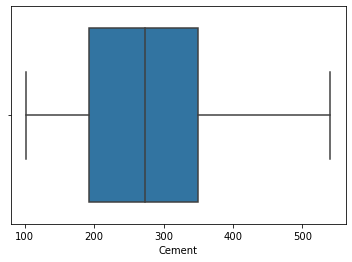

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data['Cement'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Cement', ylabel='Density'>

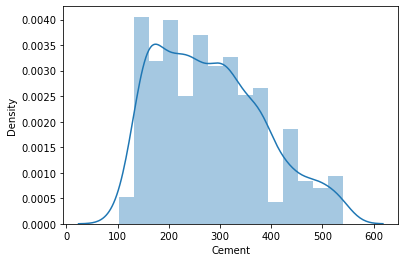

In [84]:
sns.distplot(data['Cement'])

- blast furnace slag

In [54]:
#finding q1,q3 and iqr
bfs_q1=data['Blast Furnace Slag'].quantile(q=.25)
bfs_q3=data['Blast Furnace Slag'].quantile(q=.75)
bfs_iqr=stats.iqr(data['Blast Furnace Slag'])

#upper limit and lower limmit
bfs_lower=bfs_q1-1.5*(bfs_q3-bfs_q1)
bfs_upper=bfs_q1+1.5*(bfs_q3-bfs_q1)

#beyond lower and upper limit outliers are present
bfs_out1=data[data['Blast Furnace Slag']>bfs_upper]['Blast Furnace Slag'].count()
bfs_out2=data[data['Blast Furnace Slag']<bfs_lower]['Blast Furnace Slag'].count()

print(bfs_out1*100/len(data),'%')
print(bfs_out2)

5.533980582524272 %
0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



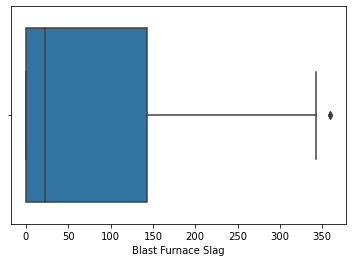

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



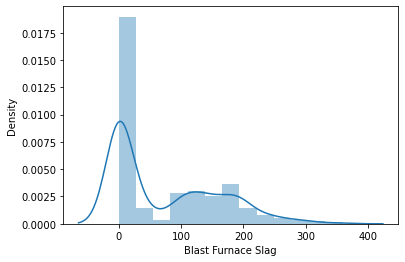

In [93]:
sns.boxplot(data['Blast Furnace Slag'])
plt.show()
sns.distplot(data['Blast Furnace Slag'])
plt.show()

- fly ash

In [55]:
#finding q1,q3 and iqr
fa_q1=data['Fly Ash'].quantile(q=.25)
fa_q3=data['Fly Ash'].quantile(q=.75)
fa_iqr=stats.iqr(data['Fly Ash'])

#upper limit and lower limmit
fa_lower=fa_q1-1.5*(fa_q3-fa_q1)
fa_upper=fa_q1+1.5*(fa_q3-fa_q1)

#beyond lower and upper limit outliers are present
fa_out1=data[data['Fly Ash']>fa_upper]['Fly Ash'].count()
fa_out2=data[data['Fly Ash']<fa_lower]['Fly Ash'].count()

print(fa_out1*100/len(data),'%')
print(fa_out2)

1.8446601941747574 %
0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



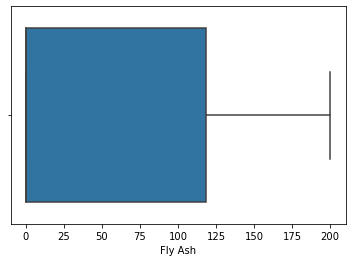

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



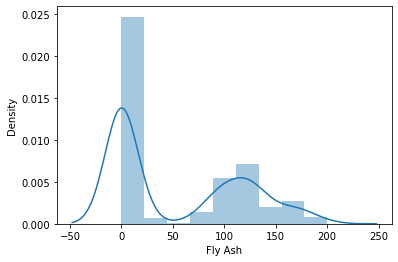

In [92]:
sns.boxplot(data['Fly Ash'])
plt.show()
sns.distplot(data['Fly Ash'])
plt.show()

- water

In [60]:
#finding q1,q3 and iqr
water_q1=data['Water'].quantile(q=.25)
water_q3=data['Water'].quantile(q=.75)
water_iqr=stats.iqr(data['Water'])

#upper limit and lower limmit
water_lower=water_q1-1.5*(water_q3-water_q1)
water_upper=water_q1+1.5*(water_q3-water_q1)

#beyond lower and upper limit outliers are present
water_out1=data[data['Water']>water_upper]['Water'].count()
water_out2=data[data['Water']<water_lower]['Water'].count()

print(water_out1*100/len(data),'%')
print(water_out2)

8.83495145631068 %
5


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



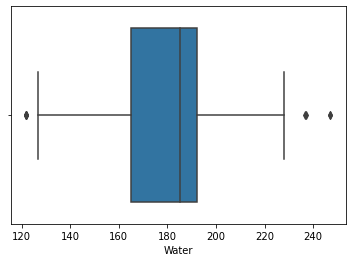

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



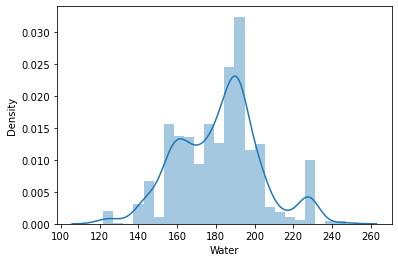

In [91]:
sns.boxplot(data['Water'])
plt.show()
sns.distplot(data['Water'])
plt.show()

- superplasticizer

In [59]:
#finding q1,q3 and iqr
super_q1=data['Superplasticizer'].quantile(q=.25)
super_q3=data['Superplasticizer'].quantile(q=.75)
super_iqr=stats.iqr(data['Superplasticizer'])

#upper limit and lower limmit
super_lower=super_q1-1.5*(super_q3-super_q1)
super_upper=super_q1+1.5*(super_q3-super_q1)

#beyond lower and upper limit outliers are present
super_out1=data[data['Superplasticizer']>super_upper]['Superplasticizer'].count()
super_out2=data[data['Superplasticizer']<super_lower]['Superplasticizer'].count()

print(super_out1*100/len(data),'%')
print(super_out2)

5.922330097087379 %
0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



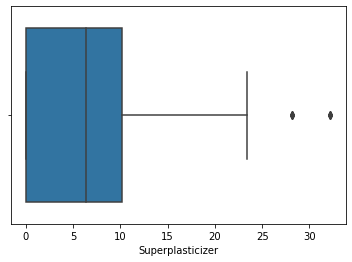

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



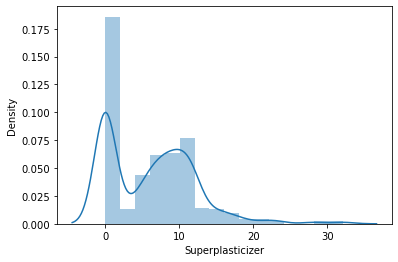

In [94]:
sns.boxplot(data['Superplasticizer'])
plt.show()
sns.distplot(data['Superplasticizer'])
plt.show()

- coarse aggregate

In [58]:
#finding q1,q3 and iqr
coarse_q1=data['Coarse Aggregate'].quantile(q=.25)
coarse_q3=data['Coarse Aggregate'].quantile(q=.75)
coarse_iqr=stats.iqr(data['Coarse Aggregate'])

#upper limit and lower limmit
coarse_lower=coarse_q1-1.5*(coarse_q3-coarse_q1)
coarse_upper=coarse_q1+1.5*(coarse_q3-coarse_q1)

#beyond lower and upper limit outliers are present
coarse_out1=data[data['Coarse Aggregate']>coarse_upper]['Coarse Aggregate'].count()
coarse_out2=data[data['Coarse Aggregate']<coarse_lower]['Coarse Aggregate'].count()

print(coarse_out1*100/len(data),'%')
print(coarse_out2)

10.0 %
0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



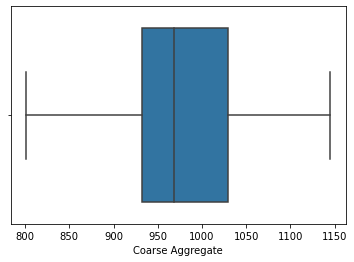

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



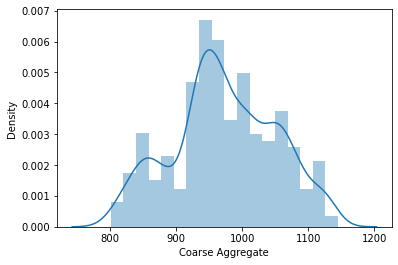

In [95]:
sns.boxplot(data['Coarse Aggregate'])
plt.show()
sns.distplot(data['Coarse Aggregate'])
plt.show()

- fine aggregate

In [61]:
#finding q1,q3 and iqr
fine_q1=data['Fine Aggregate'].quantile(q=.25)
fine_q3=data['Fine Aggregate'].quantile(q=.75)
fine_iqr=stats.iqr(data['Fine Aggregate'])

#upper limit and lower limmit
fine_lower=fine_q1-1.5*(fine_q3-fine_q1)
fine_upper=fine_q1+1.5*(fine_q3-fine_q1)

#beyond lower and upper limit outliers are present
fine_out1=data[data['Fine Aggregate']>fine_upper]['Fine Aggregate'].count()
fine_out2=data[data['Fine Aggregate']<fine_lower]['Fine Aggregate'].count()

print(fine_out1*100/len(data),'%')
print(fine_out2)

11.553398058252426 %
0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



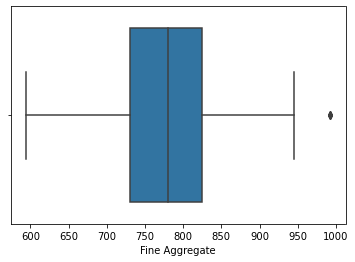

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



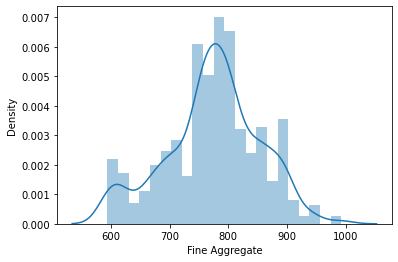

In [96]:
sns.boxplot(data['Fine Aggregate'])
plt.show()
sns.distplot(data['Fine Aggregate'])
plt.show()

- age in day

In [62]:
#finding q1,q3 and iqr
age_q1=data['Age in day'].quantile(q=.25)
age_q3=data['Age in day'].quantile(q=.75)
age_iqr=stats.iqr(data['Age in day'])

#upper limit and lower limmit
age_lower=age_q1-1.5*(age_q3-age_q1)
age_upper=age_q1+1.5*(age_q3-age_q1)

#beyond lower and upper limit outliers are present
age_out1=data[data['Age in day']>age_upper]['Age in day'].count()
age_out2=data[data['Age in day']<age_lower]['Age in day'].count()

print(age_out1*100/len(data),'%')
print(age_out2)

18.446601941747574 %
0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



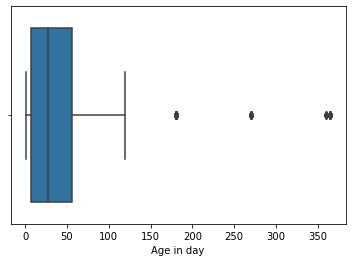

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



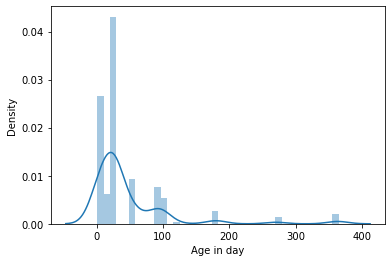

In [97]:
sns.boxplot(data['Age in day'])
plt.show()
sns.distplot(data['Age in day'])
plt.show()

- concrete strength

In [63]:
#finding q1,q3 and iqr
concrete_q1=data['Concrete Strength'].quantile(q=.25)
concrete_q3=data['Concrete Strength'].quantile(q=.75)
concrete_iqr=stats.iqr(data['Age in day'])

#upper limit and lower limmit
concrete_lower=concrete_q1-1.5*(concrete_q3-concrete_q1)
concrete_upper=concrete_q1+1.5*(concrete_q3-concrete_q1)

#beyond lower and upper limit outliers are present
concrete_out1=data[data['Concrete Strength']>concrete_upper]['Concrete Strength'].count()
concrete_out2=data[data['Concrete Strength']<concrete_lower]['Concrete Strength'].count()

print(concrete_out1*100/len(data),'%')
print(concrete_out2)

10.58252427184466 %
0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



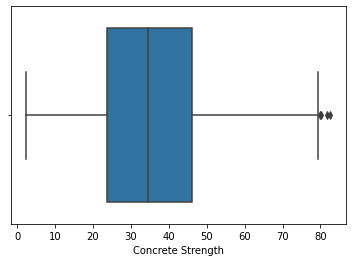

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



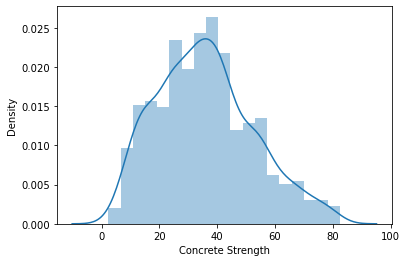

In [98]:
sns.boxplot(data['Concrete Strength'])
plt.show()
sns.distplot(data['Concrete Strength'])
plt.show()

### Multivariate Analysis

In [100]:
data.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age in day',
       'Concrete Strength'],
      dtype='object')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\HP\anaconda3\lib\site-packages\seabor

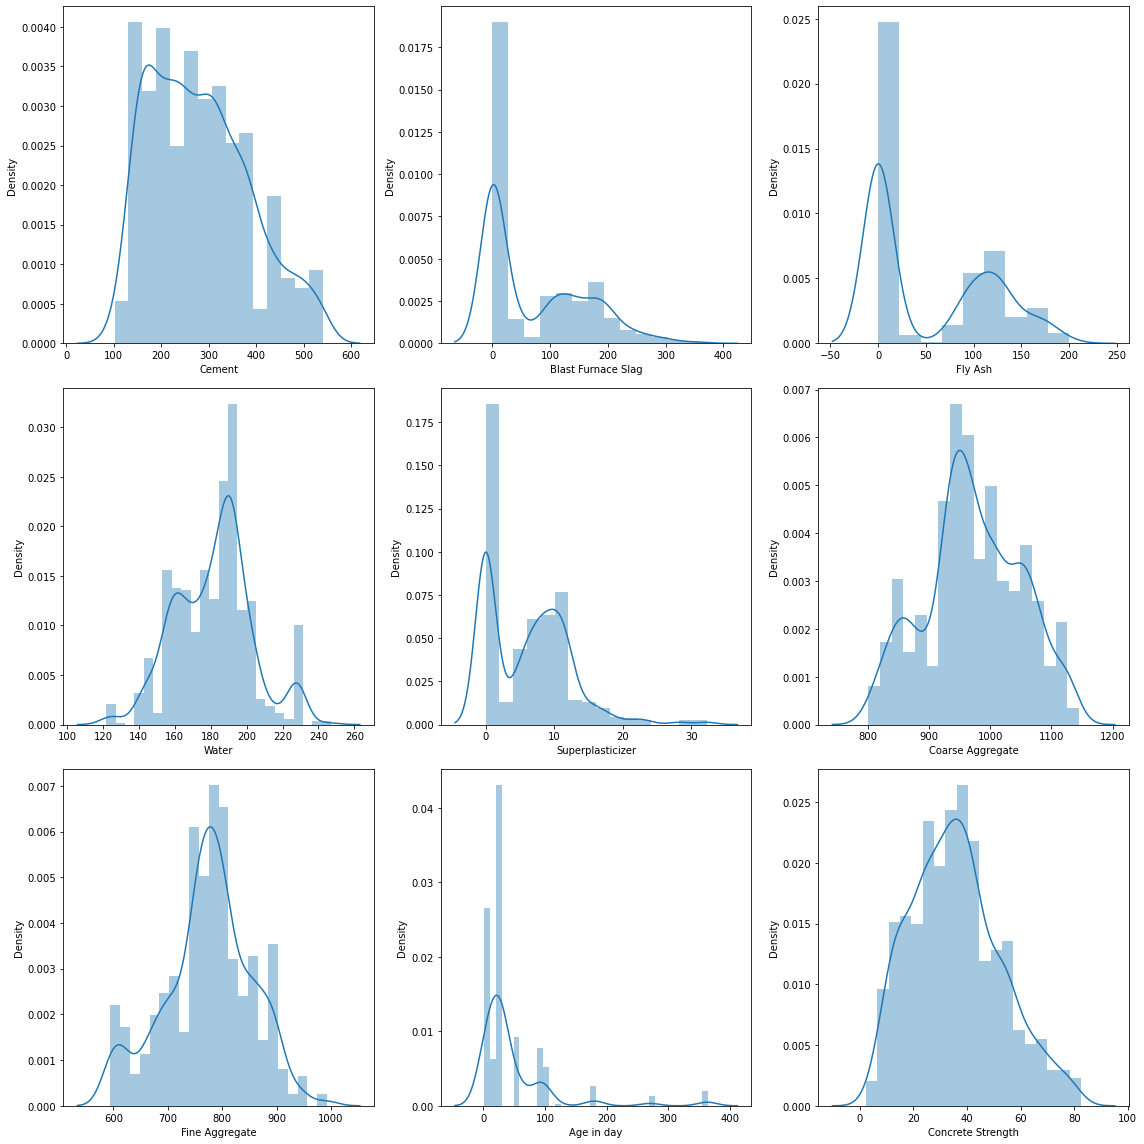

In [110]:
#Displot

fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(data['Cement'],ax=ax2[0][0])
sns.distplot(data['Blast Furnace Slag'],ax=ax2[0][1])
sns.distplot(data['Fly Ash'],ax=ax2[0][2])
sns.distplot(data['Water'],ax=ax2[1][0])
sns.distplot(data['Superplasticizer'],ax=ax2[1][1])
sns.distplot(data['Coarse Aggregate'],ax=ax2[1][2])
sns.distplot(data['Fine Aggregate'],ax=ax2[2][0])
sns.distplot(data['Age in day'],ax=ax2[2][1])
sns.distplot(data['Concrete Strength'],ax=ax2[2][2])
plt.tight_layout()

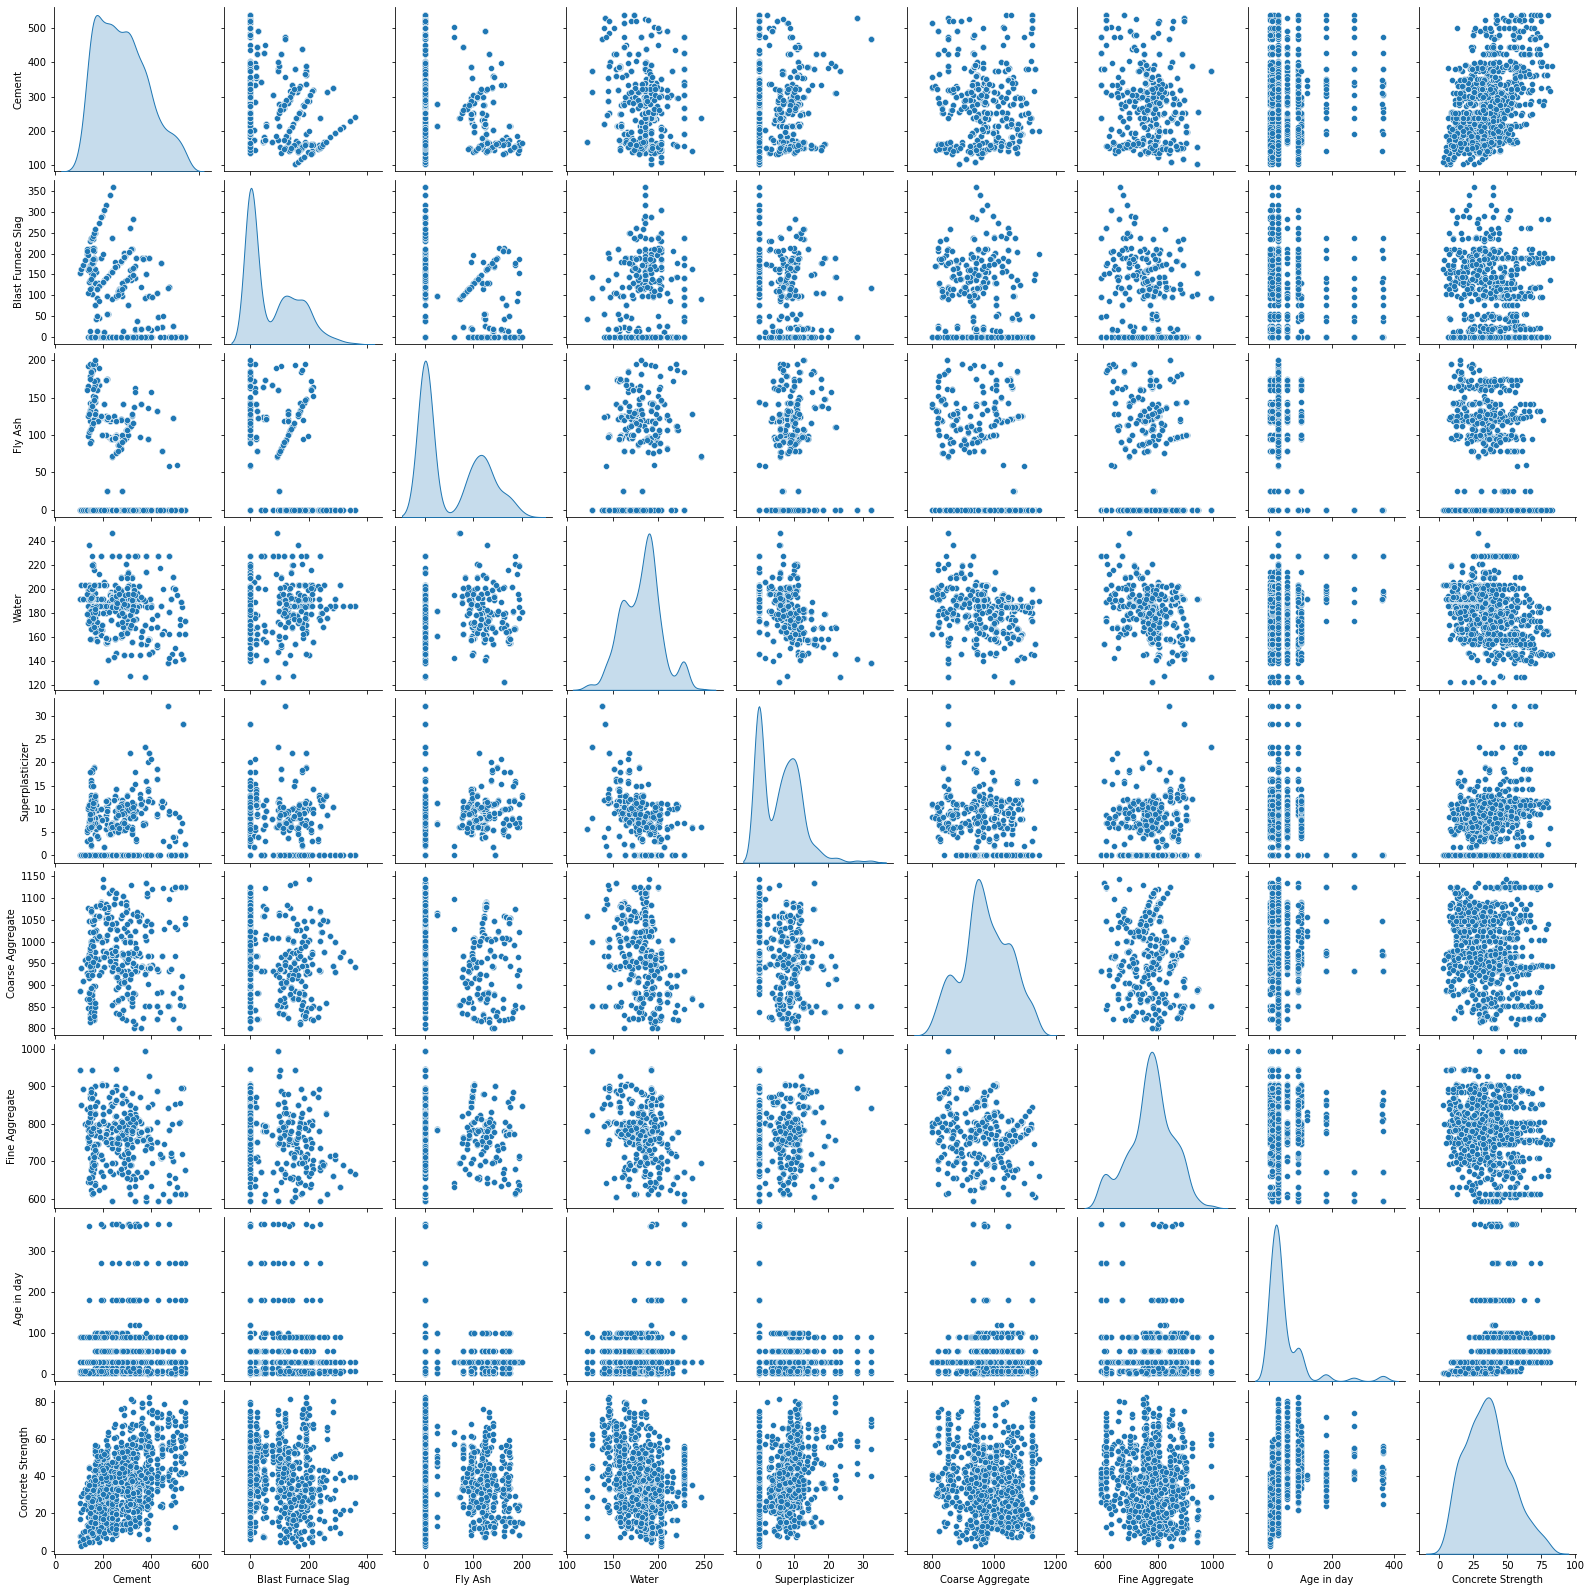

In [112]:
sns.pairplot(data,diag_kind='kde')

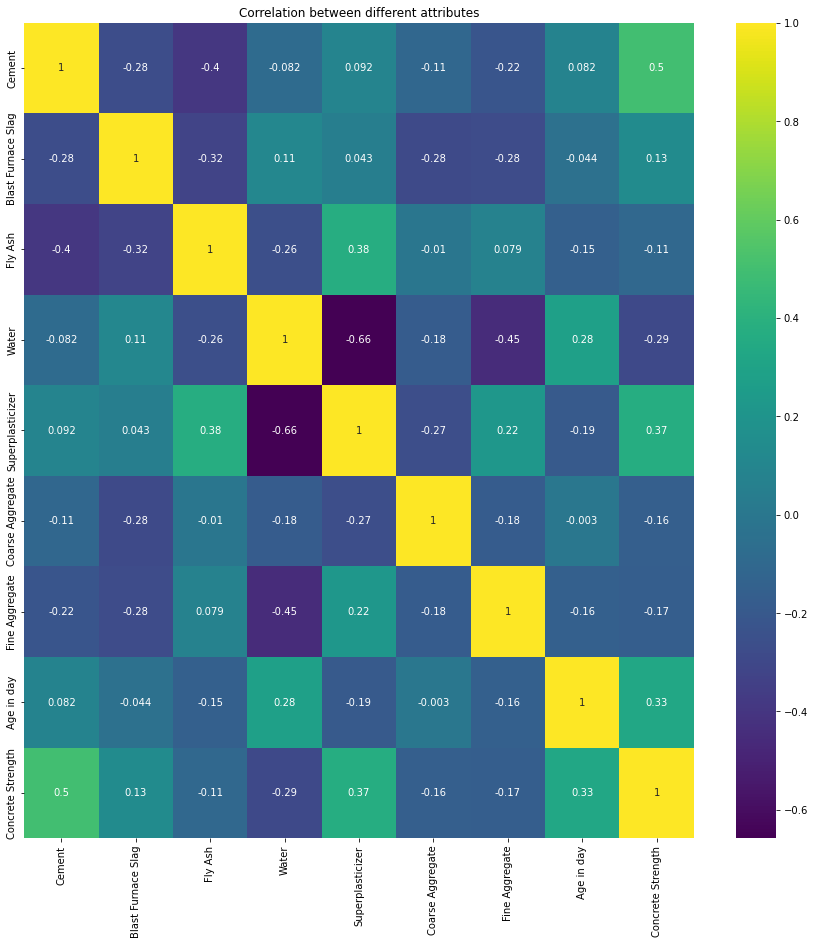

In [117]:
plt.figure(figsize=(15,15))

sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

<AxesSubplot:>

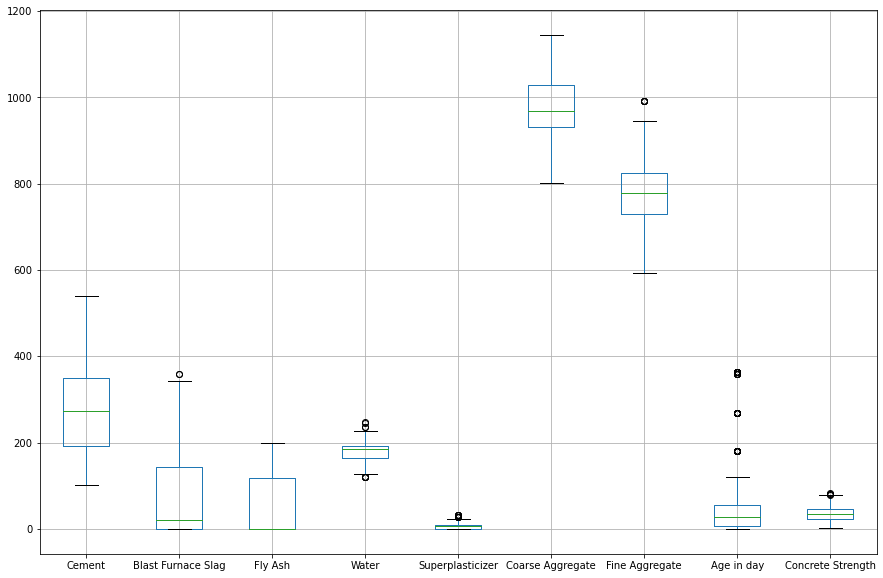

In [118]:
data.boxplot(figsize=(15,10))

In [124]:
#replacing outliers with median
for i in data.columns[:-1]:
    q1=data[i].quantile(.25)
    q3=data[i].quantile(.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr
    data.loc[(data[i]<low) | (data[i]>high),i]=data[i].median()

<AxesSubplot:>

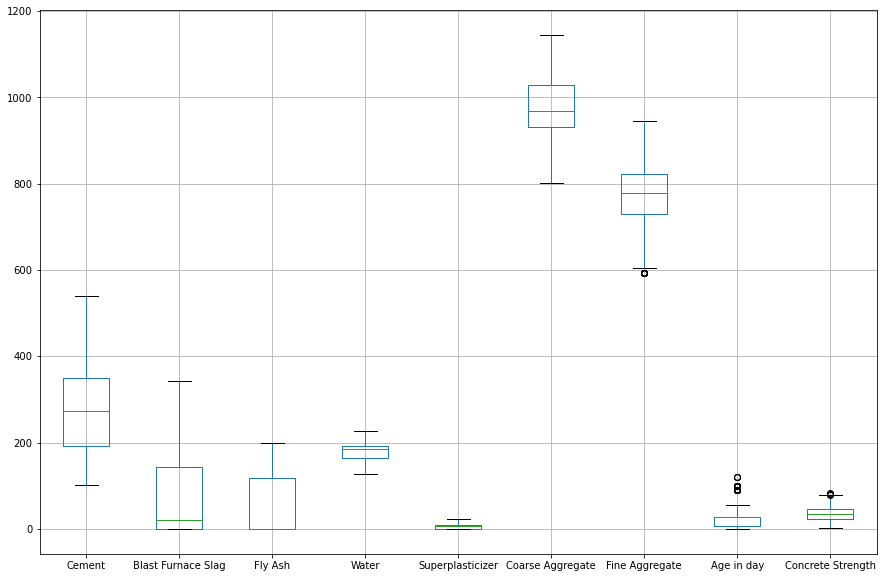

In [126]:
data.boxplot(figsize=(15,10))

### Feature Engineering

In [127]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age in day,Concrete Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


In [128]:
x=data.drop('Concrete Strength',axis=1)
y=data['Concrete Strength']

In [130]:
from scipy.stats import zscore
xscaled=x.apply(zscore)

In [132]:
xscaled.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age in day
0,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,0.863154,-1.227306,-0.153159
1,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,1.056164,-1.227306,-0.153159
2,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159
3,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159
4,-0.790459,0.693195,-0.847144,0.502442,-1.091166,0.070527,0.673158,-0.153159


In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xscaled,y,test_size=0.3,random_state=1)

### Building different models

- Random Forest Regressor

In [266]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
ypred=rf.predict(x_test)
acc=r2_score(y_test,ypred)

In [267]:
acc

0.8744842764227998

In [268]:
rf.score(x_train,y_train)

0.981744059772039

In [269]:
mean_squared_error(y_test,ypred)#we try to minimize this error

32.89857473896215

In [270]:
result=pd.DataFrame({'Algorithm':['Random Forest Regressor'],'accuracy':acc},index={'1'})

In [271]:
result

,Algorithm,accuracy
1,Random Forest Regressor,0.874484


- KFold cross Validation

In [272]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=20)
k_results=cross_val_score(rf,x,y,cv=kfold)
acc1=np.mean(abs(k_results))

<IPython.core.display.Javascript object>

In [273]:
k_results

array([0.63555131, 0.82251746, 0.36175575, 0.9602947 , 0.76323718,
       0.84996667, 0.63431231, 0.70200467, 0.4052946 , 0.498825  ,
       0.80216407, 0.65666174, 0.88496143, 0.85518368, 0.86009001,
       0.85481894, 0.91035662, 0.95474672, 0.87496427, 0.95168034])

In [274]:
acc1

0.7619693729583776

In [275]:
result=pd.concat([result,pd.DataFrame({'Algorithm':['Random Forest Regressor Kfold'],'accuracy':acc1},index={'2'})])

In [276]:
result

,Algorithm,accuracy
1,Random Forest Regressor,0.874484
2,Random Forest Regressor Kfold,0.761969


- Gradient Boosting Regressor

In [277]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
ypred1=gb.predict(x_test)
acc2=r2_score(y_test,ypred1)

In [278]:
acc2

0.880378617959885

In [279]:
mean_squared_error(y_test,ypred1)

31.35362538864832

In [280]:
result=pd.concat([result,pd.DataFrame({'Algorithm':['Gradient Boosting Regressor'],'accuracy':acc2},index={'3'})])
result

,Algorithm,accuracy
1,Random Forest Regressor,0.874484
2,Random Forest Regressor Kfold,0.761969
3,Gradient Boosting Regressor,0.880379


- KFold cross validation

In [281]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=20)
k_results1=cross_val_score(gb,x,y,cv=kfold)
acc4=np.mean(abs(k_results1))

<IPython.core.display.Javascript object>

In [282]:
acc4

0.7702512848301588

In [283]:
result=pd.concat([result,pd.DataFrame({'Algorithm':['Gradient Boosting Regressor Kfold'],'accuracy':acc4},index={'4'})])
result

,Algorithm,accuracy
1,Random Forest Regressor,0.874484
2,Random Forest Regressor Kfold,0.761969
3,Gradient Boosting Regressor,0.880379
4,Gradient Boosting Regressor Kfold,0.770251


- Ada Boosting

In [284]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
ypred2=ab.predict(x_test)
acc5=r2_score(y_test,ypred2)

In [285]:
acc5

0.756786780025885

In [286]:
mean_squared_error(y_test,ypred2)

63.74793585044918

In [287]:
result=pd.concat([result,pd.DataFrame({'Algorithm':['Ada Boost Regressor'],'accuracy':acc5},index={'5'})])
result

,Algorithm,accuracy
1,Random Forest Regressor,0.874484
2,Random Forest Regressor Kfold,0.761969
3,Gradient Boosting Regressor,0.880379
4,Gradient Boosting Regressor Kfold,0.770251
5,Ada Boost Regressor,0.756787


- Kfold Ada boost regressor

In [288]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=20)
k_results3=cross_val_score(ab,x,y,cv=kfold)
acc6=np.mean(abs(k_results3))

<IPython.core.display.Javascript object>

In [289]:
result=pd.concat([result,pd.DataFrame({'Algorithm':['Ada Boost Regressor Kfold'],'accuracy':acc6},index={'6'})])
result

,Algorithm,accuracy
1,Random Forest Regressor,0.874484
2,Random Forest Regressor Kfold,0.761969
3,Gradient Boosting Regressor,0.880379
4,Gradient Boosting Regressor Kfold,0.770251
5,Ada Boost Regressor,0.756787
6,Ada Boost Regressor Kfold,0.581263


- Knn regressor

In [290]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)
ypred3=ab.predict(x_test)
acc7=r2_score(y_test,ypred3)

diff_k=[]
for i in range(1,45):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  diff_k.append([i,r2_score(y_test,pred_i)])

result=pd.concat([result,pd.DataFrame({'Algorithm':['KNN'],'accuracy':acc7},index={'7'})])
result

- Kfold Knn

In [291]:
kfold=KFold(n_splits=20)
k_results4=cross_val_score(knn,x,y,cv=kfold)
acc8=np.mean(abs(k_results4))

<IPython.core.display.Javascript object>

In [292]:
result=pd.concat([result,pd.DataFrame({'Algorithm':['KNN Kfold'],'accuracy':acc8},index={'8'})])
result

,Algorithm,accuracy
1,Random Forest Regressor,0.874484
2,Random Forest Regressor Kfold,0.761969
3,Gradient Boosting Regressor,0.880379
4,Gradient Boosting Regressor Kfold,0.770251
5,Ada Boost Regressor,0.756787
6,Ada Boost Regressor Kfold,0.581263
8,KNN Kfold,0.448040


- Bagging Regressor

In [293]:
from sklearn.ensemble import BaggingRegressor
br=BaggingRegressor()
br.fit(x_train,y_train)
pred=br.predict(x_test)
acc9=r2_score(y_test,pred)

In [294]:
result=pd.concat([result,pd.DataFrame({'Algorithm':['Bagging Regressor'],'accuracy':acc9},index={'9'})])
result

,Algorithm,accuracy
1,Random Forest Regressor,0.874484
2,Random Forest Regressor Kfold,0.761969
3,Gradient Boosting Regressor,0.880379
4,Gradient Boosting Regressor Kfold,0.770251
5,Ada Boost Regressor,0.756787
6,Ada Boost Regressor Kfold,0.581263
8,KNN Kfold,0.448040
9,Bagging Regressor,0.876608


- Kfold Bagging Regressor

In [295]:
kfold=KFold(n_splits=20)
k_results5=cross_val_score(br,x,y,cv=kfold)
acc10=np.mean(abs(k_results5))

<IPython.core.display.Javascript object>

In [296]:
result=pd.concat([result,pd.DataFrame({'Algorithm':['Bagging Regressor Kfold'],'accuracy':acc10},index={'10'})])
result

,Algorithm,accuracy
1,Random Forest Regressor,0.874484
2,Random Forest Regressor Kfold,0.761969
3,Gradient Boosting Regressor,0.880379
4,Gradient Boosting Regressor Kfold,0.770251
5,Ada Boost Regressor,0.756787
6,Ada Boost Regressor Kfold,0.581263
8,KNN Kfold,0.448040
9,Bagging Regressor,0.876608
10,Bagging Regressor Kfold,0.740031


- Support Vector Regressor

In [297]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred1=svr.predict(x_test)
acc11=r2_score(y_test,pred1)

In [298]:
result=pd.concat([result,pd.DataFrame({'Algorithm':['SVR'],'accuracy':acc11},index={'11'})])
result

,Algorithm,accuracy
1,Random Forest Regressor,0.874484
2,Random Forest Regressor Kfold,0.761969
3,Gradient Boosting Regressor,0.880379
4,Gradient Boosting Regressor Kfold,0.770251
5,Ada Boost Regressor,0.756787
6,Ada Boost Regressor Kfold,0.581263
8,KNN Kfold,0.448040
9,Bagging Regressor,0.876608
10,Bagging Regressor Kfold,0.740031
11,SVR,0.653889


- XGBoost

In [299]:
from xgboost import XGBRegressor
xgr=XGBRegressor()
xgr.fit(x_train,y_train)
pred2=xgr.predict(x_test)
acc12=r2_score(y_test,pred2)

In [300]:
result=pd.concat([result,pd.DataFrame({'Algorithm':['XGBRegressor'],'accuracy':acc12},index={'12'})])
result

,Algorithm,accuracy
1,Random Forest Regressor,0.874484
2,Random Forest Regressor Kfold,0.761969
3,Gradient Boosting Regressor,0.880379
4,Gradient Boosting Regressor Kfold,0.770251
5,Ada Boost Regressor,0.756787
6,Ada Boost Regressor Kfold,0.581263
8,KNN Kfold,0.448040
9,Bagging Regressor,0.876608
10,Bagging Regressor Kfold,0.740031
11,SVR,0.653889


In [301]:
kfold=KFold(n_splits=20)
k_results7=cross_val_score(xgr,x,y,cv=kfold)
acc13=np.mean(abs(k_results7))

<IPython.core.display.Javascript object>

In [302]:
result=pd.concat([result,pd.DataFrame({'Algorithm':['XGBRegressor Kfold'],'accuracy':acc13},index={'13'})])
result

,Algorithm,accuracy
1,Random Forest Regressor,0.874484
2,Random Forest Regressor Kfold,0.761969
3,Gradient Boosting Regressor,0.880379
4,Gradient Boosting Regressor Kfold,0.770251
5,Ada Boost Regressor,0.756787
6,Ada Boost Regressor Kfold,0.581263
8,KNN Kfold,0.448040
9,Bagging Regressor,0.876608
10,Bagging Regressor Kfold,0.740031
11,SVR,0.653889


- Decision Tree Regressor

In [303]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred3=dtr.predict(x_test)
acc14=r2_score(y_test,pred3)

In [304]:
result=pd.concat([result,pd.DataFrame({'Algorithm':['Decision Tree Regressor'],'accuracy':acc14},index={'14'})])
result

,Algorithm,accuracy
1,Random Forest Regressor,0.874484
2,Random Forest Regressor Kfold,0.761969
3,Gradient Boosting Regressor,0.880379
4,Gradient Boosting Regressor Kfold,0.770251
5,Ada Boost Regressor,0.756787
6,Ada Boost Regressor Kfold,0.581263
8,KNN Kfold,0.448040
9,Bagging Regressor,0.876608
10,Bagging Regressor Kfold,0.740031
11,SVR,0.653889


In [305]:
#printing the feature importance
print('Feature importances:\n',pd.DataFrame(dtr.feature_importances_,columns=['Importance'],index=x_train.columns))

Feature importances:
                     Importance
Cement                0.309942
Blast Furnace Slag    0.058973
Fly Ash               0.008205
Water                 0.123991
Superplasticizer      0.049142
Coarse Aggregate      0.028776
Fine Aggregate        0.047968
Age in day            0.373003


In [306]:
# importent features= Cement,Water,age

In [307]:
df=data.copy()

In [308]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age in day',
       'Concrete Strength'],
      dtype='object')

In [314]:
X=df.drop(['Concrete Strength','Fly Ash','Coarse Aggregate','Fine Aggregate'],axis=1)
x=x.apply(zscore)
Y=df['Concrete Strength']

In [315]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,test_size=.3,random_state=1)

In [318]:
dtr_new=DecisionTreeRegressor()
dtr_new.fit(x1_train,y1_train)
pred4=dtr_new.predict(x1_test)
acc15=r2_score(y1_test,pred4)

In [319]:
acc15

0.8084223781097152

In [322]:
#printing the feature importance
print('Feature importances:\n',pd.DataFrame(dtr_new.feature_importances_,columns=['Importance'],index=x1_train.columns))

Feature importances:
                     Importance
Cement                0.350030
Blast Furnace Slag    0.075249
Water                 0.141380
Superplasticizer      0.056193
Age in day            0.377147


In [323]:
result=pd.concat([result,pd.DataFrame({'Algorithm':['Decision Tree Regressor 2'],'accuracy':acc15},index={'15'})])
result

,Algorithm,accuracy
1,Random Forest Regressor,0.874484
2,Random Forest Regressor Kfold,0.761969
3,Gradient Boosting Regressor,0.880379
4,Gradient Boosting Regressor Kfold,0.770251
5,Ada Boost Regressor,0.756787
6,Ada Boost Regressor Kfold,0.581263
8,KNN Kfold,0.448040
9,Bagging Regressor,0.876608
10,Bagging Regressor Kfold,0.740031
11,SVR,0.653889
